<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
# identify
dup_count = df.duplicated().sum()
print("Duplicate rows (excluding firsts):", dup_count)

# remove
df = df.drop_duplicates().reset_index(drop=True)
print("Remaining duplicates:", df.duplicated().sum())

Duplicate rows (excluding firsts): 0
Remaining duplicates: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
col = "CodingActivities"
print(f"Missing in {col}:", df[col].isna().sum())

Missing in CodingActivities: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
col = "CodingActivities"
df[col] = df[col].ffill()
print(f"Missing in {col} after ffill:", df[col].isna().sum())

Missing in CodingActivities after ffill: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
# Find compensation-related columns
comp_cols = [c for c in df.columns if any(k in c.lower() for k in ["comp", "salary", "pay", "income"])]
print("Compensation-related columns:", comp_cols)

# Choose the main one for normalization (prefer ConvertedCompYearly)
comp_col = "ConvertedCompYearly" if "ConvertedCompYearly" in df.columns else (comp_cols[0] if comp_cols else None)
print("Chosen column for normalization:", comp_col)

# Ensure numeric and show a quick summary
if comp_col:
    df[comp_col] = pd.to_numeric(df[comp_col], errors="coerce")
    print("Min:", df[comp_col].min(), "Max:", df[comp_col].max(), "Missing:", df[comp_col].isna().sum())
else:
    print("No compensation column found.")

Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']
Chosen column for normalization: ConvertedCompYearly
Min: 1.0 Max: 16256603.0 Missing: 42002


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [11]:
col = "ConvertedCompYearly"
min_v, max_v = df[col].min(), df[col].max()
df["ConvertedCompYearly_MinMax"] = (df[col] - min_v) / (max_v - min_v)

# quick check
df[["ConvertedCompYearly", "ConvertedCompYearly_MinMax"]].head()

,ConvertedCompYearly,ConvertedCompYearly_MinMax
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [14]:
col = "ConvertedCompYearly"
# ensure numeric
df[col] = pd.to_numeric(df[col], errors="coerce")

# z-score = (x - mean) / std
mu = df[col].mean()
sigma = df[col].std()           # sample std (ignores NaNs)
df["ConvertedCompYearly_Zscore"] = (df[col] - mu) / sigma

print("Mean:", round(mu,2), "Std:", round(sigma,2))
print("NaNs in Zscore:", df["ConvertedCompYearly_Zscore"].isna().sum())

Mean: 86155.29 Std: 186756.97
NaNs in Zscore: 42002


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


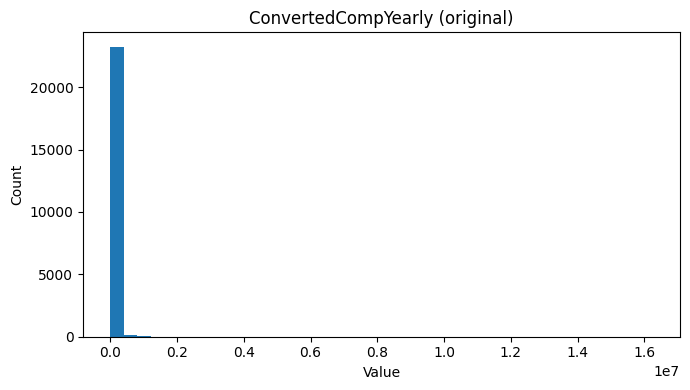

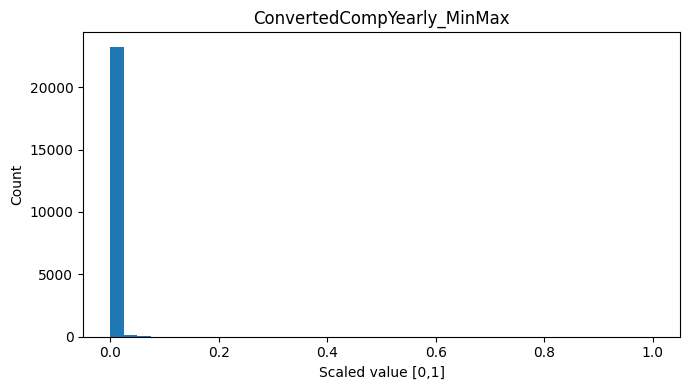

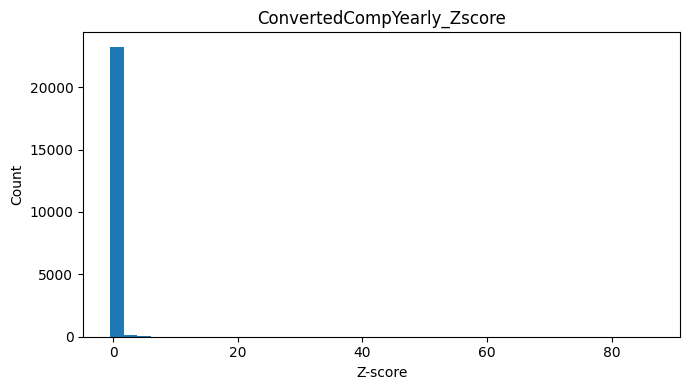

In [15]:
import matplotlib.pyplot as plt

# create Min-Max column if it doesn't exist
mm_col = "ConvertedCompYearly_MinMax"
if mm_col not in df.columns:
    min_v, max_v = df[col].min(), df[col].max()
    df[mm_col] = (df[col] - min_v) / (max_v - min_v)

# --- Original ---
plt.figure(figsize=(7,4))
plt.hist(df[col].dropna(), bins=40)
plt.title("ConvertedCompYearly (original)")
plt.xlabel("Value"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# --- Min-Max ---
plt.figure(figsize=(7,4))
plt.hist(df[mm_col].dropna(), bins=40)
plt.title("ConvertedCompYearly_MinMax")
plt.xlabel("Scaled value [0,1]"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# --- Z-score ---
plt.figure(figsize=(7,4))
plt.hist(df["ConvertedCompYearly_Zscore"].dropna(), bins=40)
plt.title("ConvertedCompYearly_Zscore")
plt.xlabel("Z-score"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
